# This notebook is for the Fair-Shapely experiment

In [1]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [3]:
from src.data.unified_dataloader import load_dataset

_, processed_default_credit = load_dataset('default_credit')

target_name = 'default_payment_next_month'
processed_default_credit.head(5)

,LIMIT_BAL,sex,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default_payment_next_month
0,-1.136720,0,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,...,0,0,0,0,0,0,0,0,0,1
1,-0.365981,0,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,...,0,0,1,0,0,0,0,0,0,1
2,-0.597202,0,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,...,0,1,0,0,0,0,0,0,0,0
3,-0.905498,0,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,...,0,1,0,0,0,0,0,0,0,0
4,-0.905498,1,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,...,0,1,0,0,0,0,0,0,0,0


In [4]:
processed_default_credit.columns

Index(['LIMIT_BAL', 'sex', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY

### 3. Split label/unlabel data, split train/test data.

In [5]:
'''UCI dataset'''
# df = processed_default_credit.copy()
# X = df.drop('income', axis=1)
# y = df['income']

'''German Credit dataset'''
# df = processed_german_credit.copy()
# X = df.drop('Risk', axis=1)
# y = df['Risk']

'''Default Credit dataset'''
df = processed_default_credit.copy()
X = df.drop(target_name, axis=1)
y = df[target_name]

# 10% X_label, 90% X_unlabel
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X, y, test_size=0.9, random_state=25) 
print(f'X_label shape: {X_label.shape}')
print(f'X_unlabel shape: {X_unlabel.shape}')
print('---------------------------------')
# split labeled data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.3, random_state=25) 
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_label shape: (3000, 90)
X_unlabel shape: (27000, 90)
---------------------------------
X_train shape: (2100, 90)
X_test shape: (900, 90)


### 4. Train the original model

In [6]:
model = XGBClassifier()  # 可以替换为 RandomForestClassifier() 等其他模型
model.fit(X_train,y_train)

# 预测和评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8066666666666666


In [7]:
from src.baselines import Baseline

baseline = Baseline(X_train, y_train, X_test, y_test, X_unlabel, model='xgboost')
baseline.get_baseline1()

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-27 01:01:45.635 | INFO     | src.baselines:get_baseline1:44 - baseline1: 使用了xgboost, Accuracy: 0.807, DR: 0.02408


In [8]:
'''
使用nearest neighbour在unlabel data中挑选与X_train相近的数据, 他们label使用与之匹配的X_train的label, 然后加入training set.   (结果不行)
'''
baseline.get_baseline2()

2025-01-27 01:01:46.627 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.2, num_new_data: 1, Accuracy: 0.806, DR: 0.03120
2025-01-27 01:01:47.276 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.2, num_new_data: 2, Accuracy: 0.790, DR: 0.02587
2025-01-27 01:01:48.107 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.2, num_new_data: 3, Accuracy: 0.806, DR: 0.04871
2025-01-27 01:01:48.708 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.4, num_new_data: 1, Accuracy: 0.793, DR: 0.04161
2025-01-27 01:01:49.682 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.4, num_new_data: 2, Accuracy: 0.789, DR: 0.03902
2025-01-27 01:01:51.073 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.4, num_new_data: 3, Accuracy: 0.794, DR: 0.04638
2025-01-27 01:01:51.836 | INFO     | src.baselines:get_baseline2

In [9]:
'''
使用nearest neighbour在unlabel data中挑选与X_train相近的数据, 直接把挑选出来的数据输入进model, 预测结果作为新的label, 然后加入training set. （效果很好）
'''
baseline.get_baseline3()

2025-01-27 01:02:00.893 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.2, num_new_data: 1, Accuracy: 0.812, DR: 0.02066
2025-01-27 01:02:01.583 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.2, num_new_data: 2, Accuracy: 0.816, DR: 0.01919
2025-01-27 01:02:02.570 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.2, num_new_data: 3, Accuracy: 0.819, DR: 0.02316
2025-01-27 01:02:03.372 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.4, num_new_data: 1, Accuracy: 0.818, DR: 0.01958
2025-01-27 01:02:04.535 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.4, num_new_data: 2, Accuracy: 0.810, DR: 0.01919
2025-01-27 01:02:06.136 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.4, num_new_data: 3, Accuracy: 0.812, DR: 0.01771
2025-01-27 01:02:07.011 | INFO     | src.baselines:get_bas

### 5. Start the experiment!

>1. 只使用10%的labeled data 查看模型结果-baseline （见4, 5）
>
>2. 只使用10%的labeled data + sex balance查看模型结果
>
>3. 使用10%的labeled data， 再使用unlabel data把labeled data中的sex补齐。（使用model预测的值对unlabel data贴标签）
>
>4. 使用10%的labeled data， 再使用unlabel data时候，让新增的data中 sex balanced（使用model预测的值对unlabel data贴标签）
>
>5. 使用10%的labeled data + sex balance + new data (from unlabeled data) + sex balance + 使用labeled data中最相似的instance的标签
>
>6. 使用10%的labeled data + sex balance + new data (from unlabeled data) + sex balance + 通过pretrained model对data进行label标注
>
>7.☆☆  这里的sex balance是如何选取好点？ 是分别找sex=0和sex=1的nearest neighbour(此处数量怎么限制？按照少数的来？)。
>   还是把他们放在一个大池子里。统一挑出来，最后再限制个数为min(num_sex0, num_sex1)， 如果这样的话，对unlabeled data标注方式感觉不能直接使用原标签，是否用ml预测的结果会更好一点？

In [10]:
from src.experiments import Experiment

In [11]:
my_experiment = Experiment(
            orginal_model=model, 
            X_train=X_train, 
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            X_unlabel=X_unlabel,
            y_unlabel=y_unlabel,
            dataset_name='default_credit_card', )
'''
对于german credit，需要把 self.limited_values_range = np.arange(1, non_zero_count, 1)中的1改成50
'''

'\n对于german credit，需要把 self.limited_values_range = np.arange(1, non_zero_count, 1)中的1改成50\n'

In [37]:
# new_models_DR_values = my_experiment.get_result(
#             sex_balance = False, 
#             proportion = 0.5,
#             replacement = True, 
#             num_new_data = 3,
#             matcher = 'nn')

new_models_DR_values,_ = my_experiment.get_sex_separate_nn_result(
    sex_balance=False,
    proportion=0.6,
    replacement=True,
    num_new_data=3,
    matcher='nn',
    match_method='sex_cross'
)


开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 15318
Proporation: 0.6, new_data_number: 3 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------


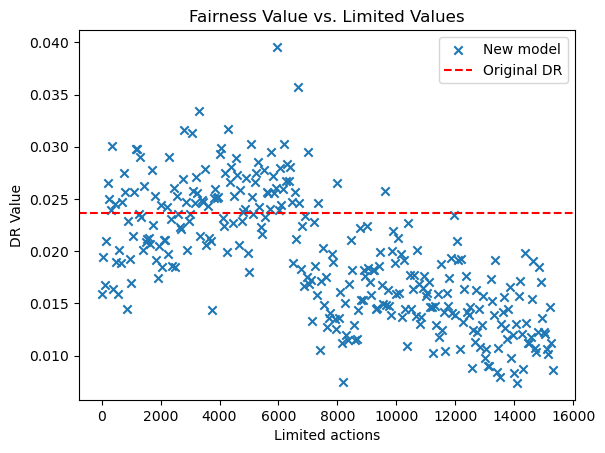

In [38]:
'''
考虑到这个dataset有大量的改动没有用，只会增加DR值，所以我选择了只改动 number_actions的1/3个数
'''

my_experiment.visualize(new_models_DR_values)

开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11554
Proporation: 0.2, new_data_number: 1 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 23177
Proporation: 0.2, new_data_number: 2 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 34518
Proporation: 0.2, new_data_number: 3 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11207
Proporation: 0.4, new_data_number: 1 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 22553
Proporation: 0.4, new_data_number: 2 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 33689
Proporation: 0.4, new_data_number: 3 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11060
Proporation: 0.6, new_data_number: 1 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 22173
Proporation: 0.6, new_data_number: 2 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 33239
Proporation: 0.6, new_data_number: 3 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 10841
Proporation: 0.8, new_data_number: 1 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 21838
Proporation: 0.8, new_data_number: 2 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 32731
Proporation: 0.8, new_data_number: 3 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------


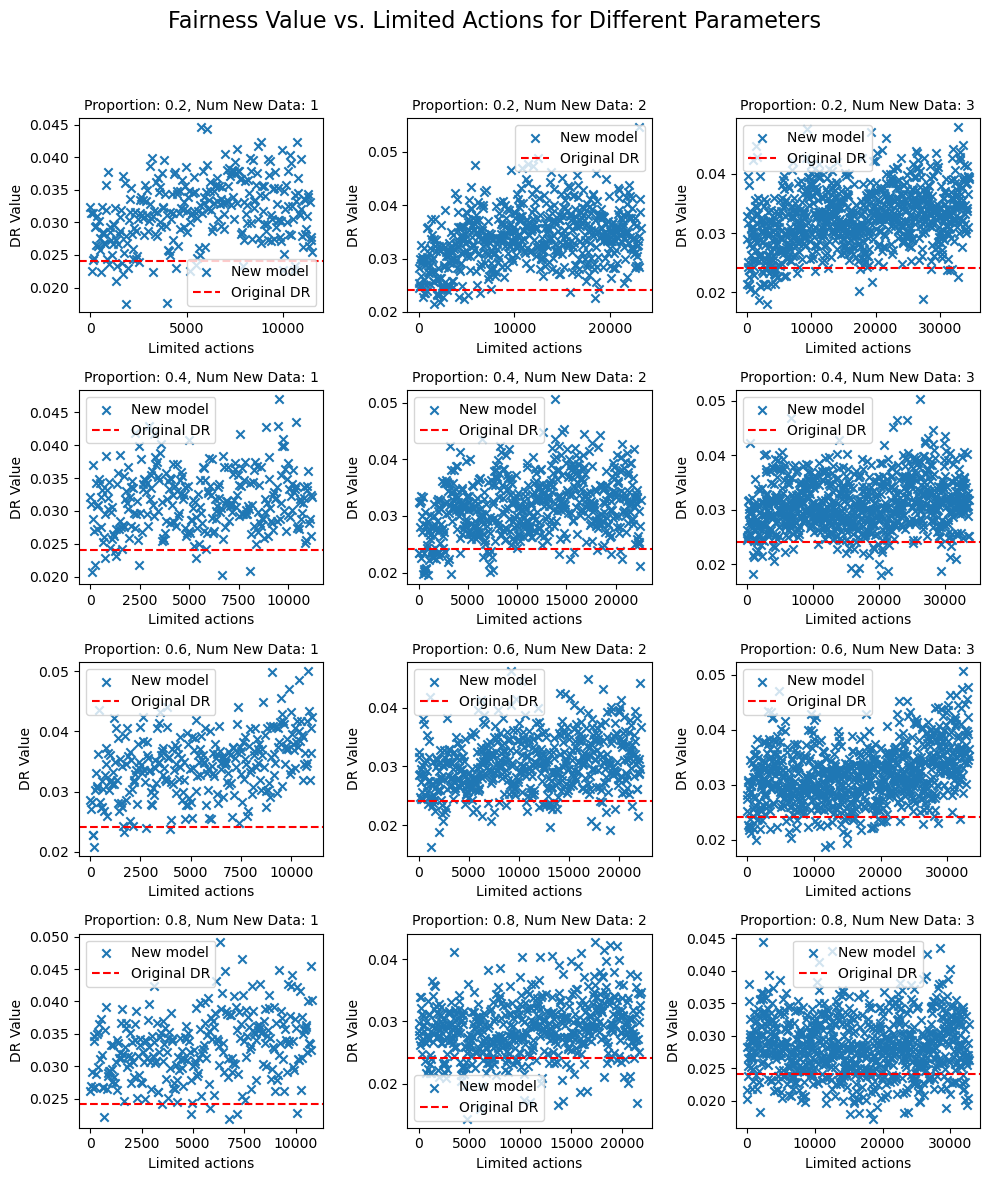

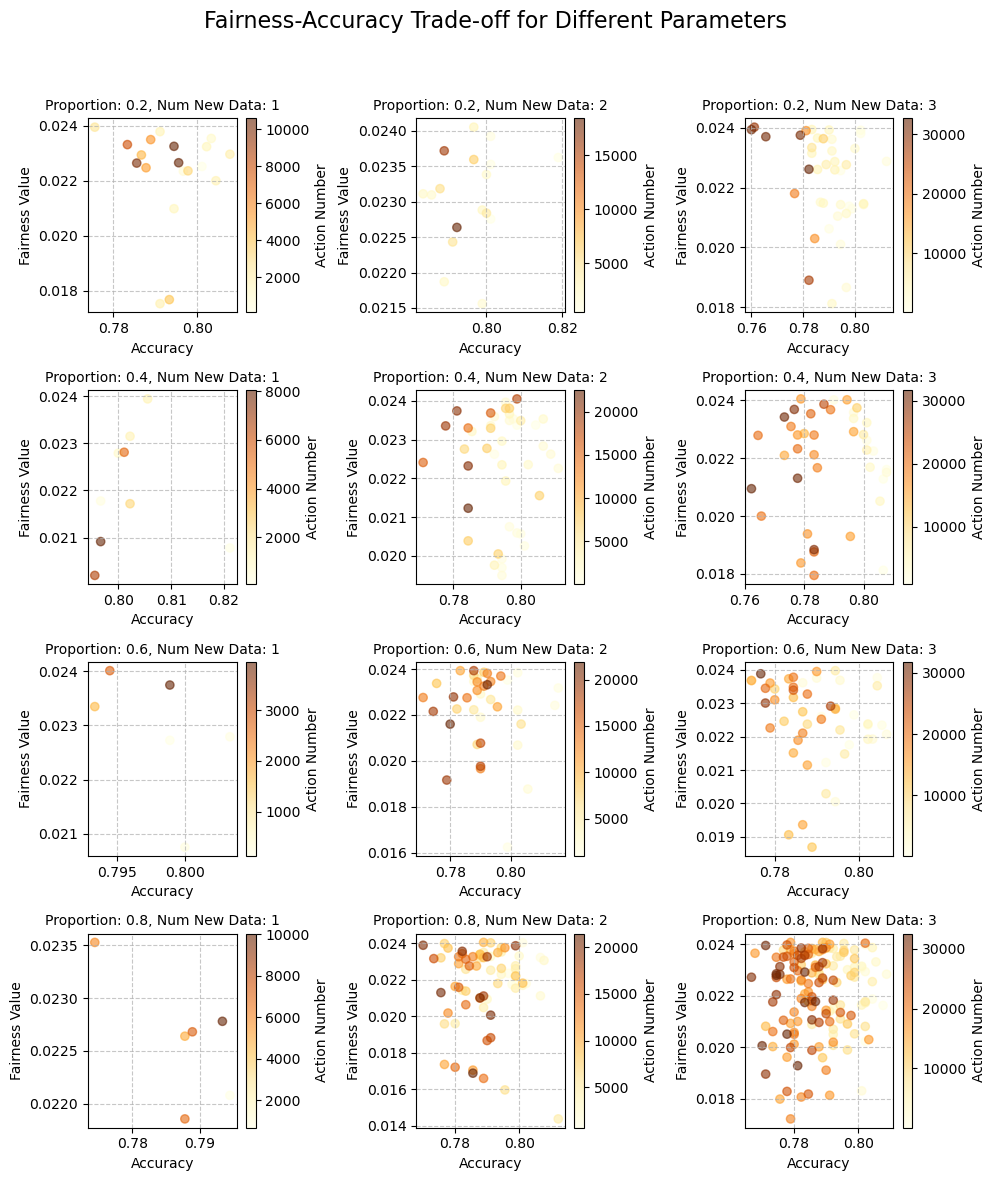

In [13]:
results = my_experiment.combination(match_met='together')

开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11596
Proporation: 0.2, new_data_number: 1 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 23380
Proporation: 0.2, new_data_number: 2 训练结束, match_method:sex_separate,DR值已经

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 22568
Proporation: 0.4, new_data_number: 2 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 33899
Proporation: 0.4, new_data_number: 3 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11165
Proporation: 0.6, new_data_number: 1 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_pick

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 22398
Proporation: 0.6, new_data_number: 2 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 33373
Proporation: 0.6, new_data_number: 3 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11051
Proporation: 0.8, new_data_number: 1 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_pick

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 22115
Proporation: 0.8, new_data_number: 2 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 32987
Proporation: 0.8, new_data_number: 3 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------


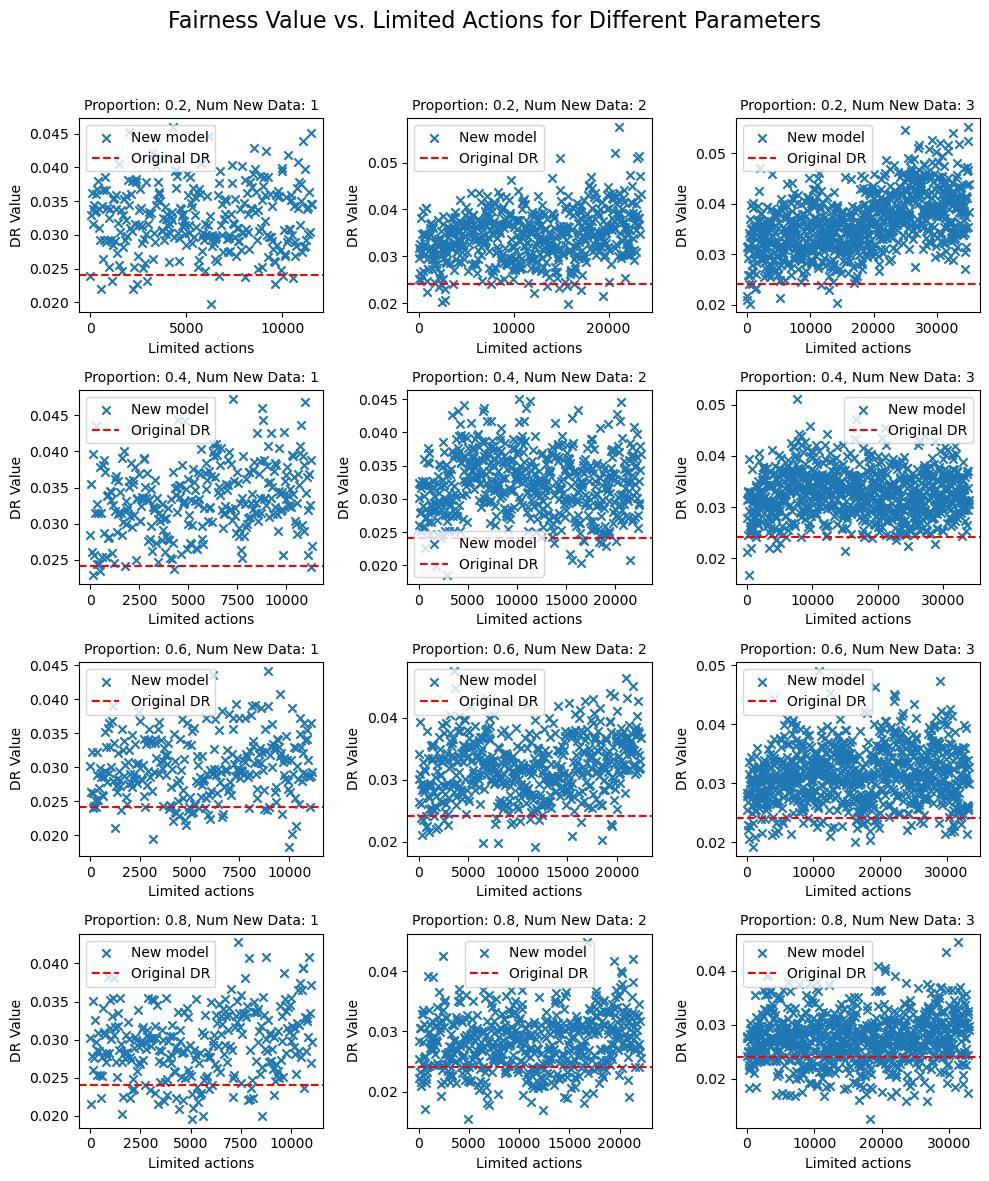

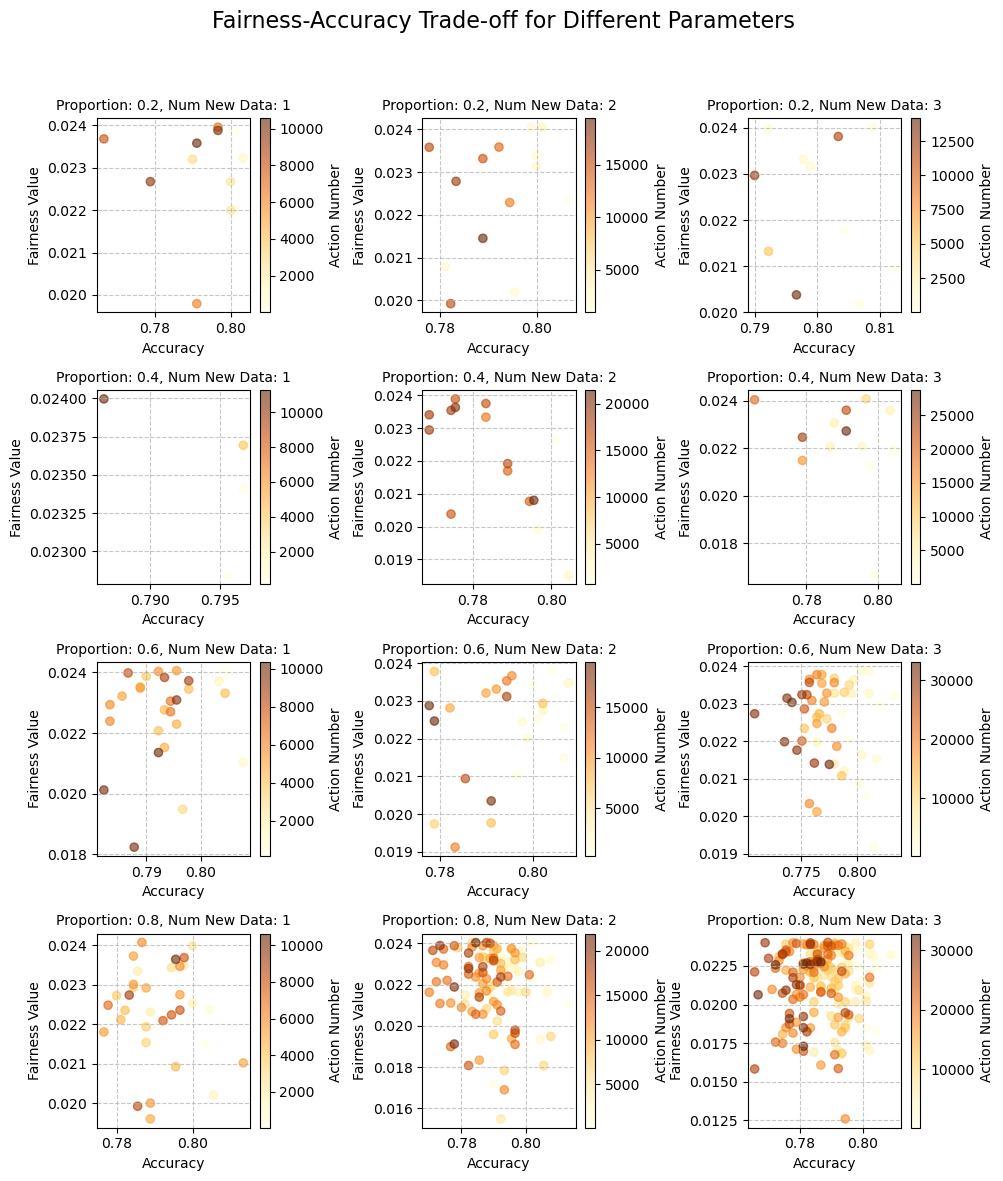

In [14]:
results_sex_separate = my_experiment.combination(match_met='sex_separate')

开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11681
Proporation: 0.2, new_data_number: 1 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 23719
Proporation: 0.2, new_data_number: 2 训练结束, match_method:sex_cross,DR值已经保存, 可以

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 34080
Proporation: 0.4, new_data_number: 3 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,2....,num_new_data-1]进行matching, 找到matching的数据
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 11179
Proporation: 0.6, new_data_number: 1 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第1步, 从X_unlabel中按照比例随机抽出num_new_data组数据
开始第2步, X_label分别与random_picks[0,1,

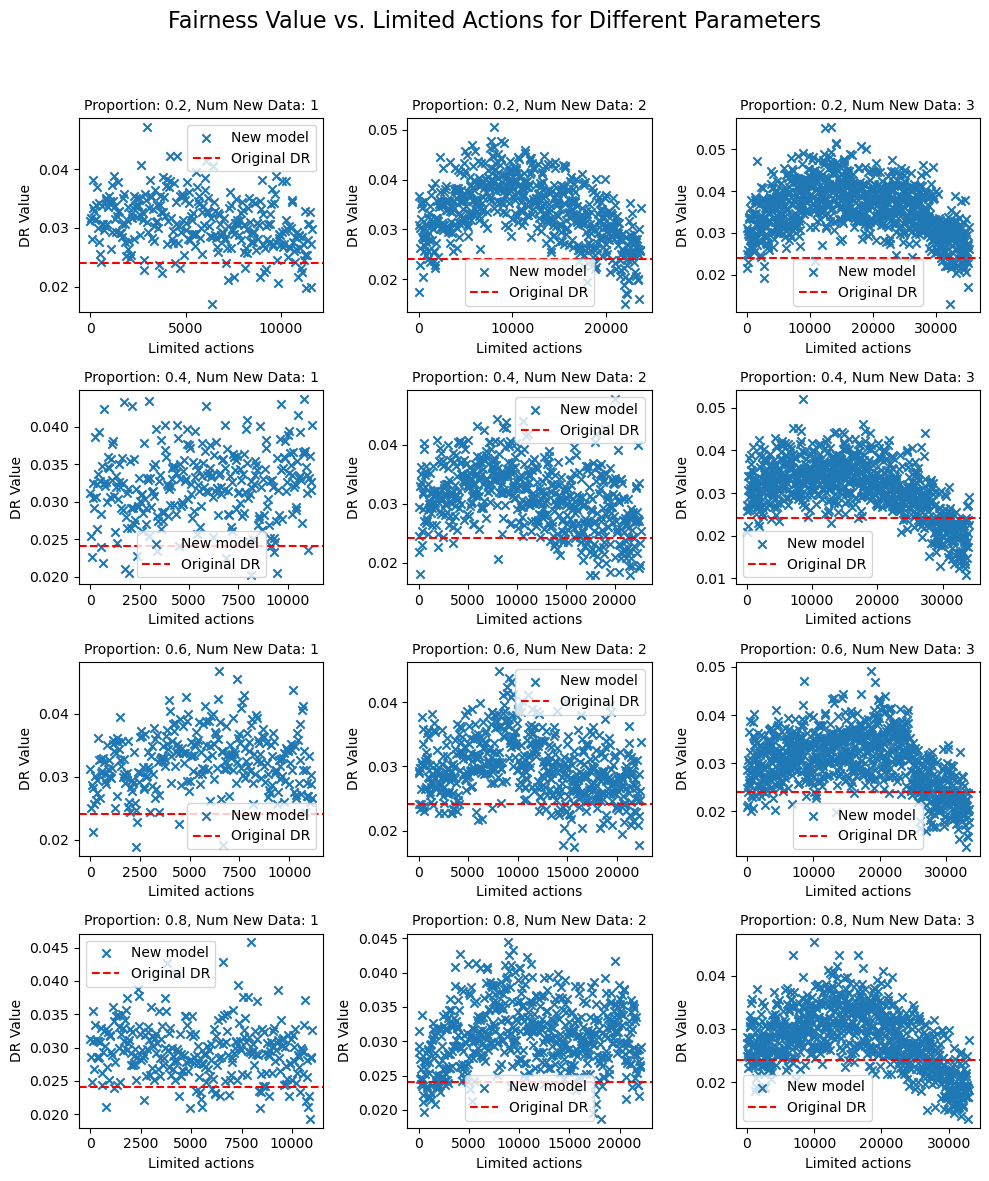

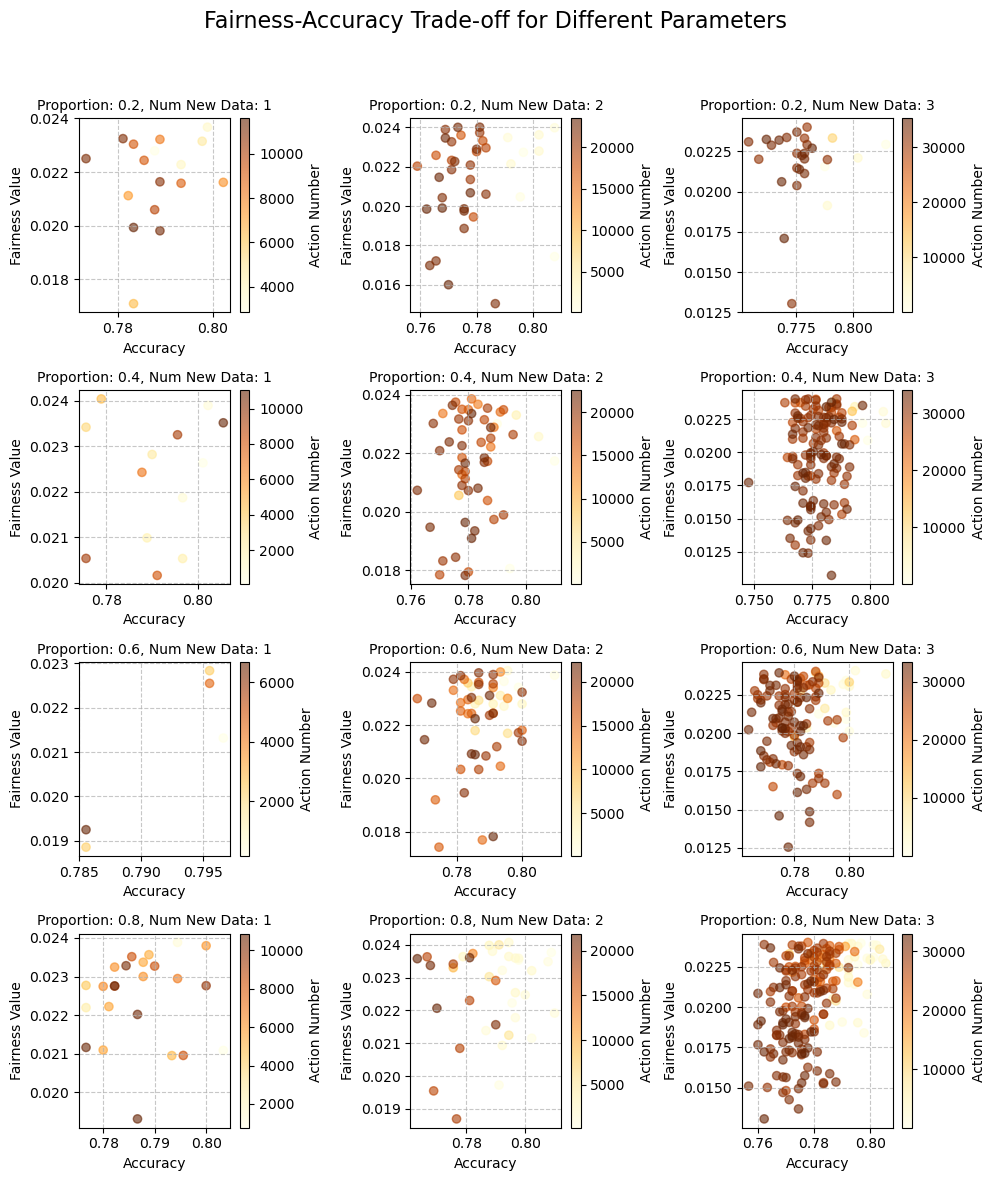

In [12]:
results_sex_cross = my_experiment.combination(match_met='sex_cross')